In [458]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#import matplotlib.cm as cm
import pandas as pd
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Results from experiment F98: SQUIDs and Noise Thermometers

#### Authors: Huth, Paris and Coc, Q'inich

## 5.1 Preparation

In this part of the experiment, we measure the resistance $R$ of $\pm V$, $\pm \phi$, $\pm \phi_X$ and $\pm I$ for channel 1 and chanel 2 at two temperatures. Room temperature $T_{room}$ and the temperature in liquid helium $T_{He}$.  Chanel two is connected to a single stage SQUID while Channel 2 is Connected to a two-stage SQUID. 


Tab. 1: Resistance of Channel 1
| Channel 1    | $R(T_{room})$ [$\Omega$] | $R(T_{He})$ [$\Omega$] |
|--------------|---------------------------|-------------------------|
| $\pm V$      | 364.0                    | 8.7                    |
| $\pm \phi$   | O.L                      | O.L                    |
| $\pm \phi_X$ | 259.0                    | 6.9                    |
| $\pm I$      | O.L                      | O.L                 |--------------|---------------------------|-------------------------| |

 
    |



Tab. 2 Resistance of Channel 2

| Channel 2   | $R(T_{room})$ [$\Omega$] | $R(T_{He})$ [$\Omega$] |
|--------------|---------------------------|-------------------------|
| $\pm V$      | N.A                       | 56.9                   |
| $\pm \phi$   | N.A                       | 7.4                    |
| $\pm \phi_X$ | N.A                       | 8.1                    |
| $\pm I$      | N.A                       | 7.1                   |

Since Channel 1 is only a single-stage SQUID the the value for $\pm \phi$ and $\pm I$ are not defined. From the values displayed in Tab. 1 it becomes clear, that the resistance decreases significantly - 97.6% in the case of  $\pm V$ and 99.97% for $\pm \phi_X$. 

During the experiment there were some misunderstanding and we didn't measure the resistance of Channel 2 at room temperature. Regardless, we can assume the values between Channel 1 and Chanel 2 to be of the same magnitude. With this assumption, we can conclude that the resistance drops drastically at low temperatures, see Tab. 2, and the reduction should be similar to the one observed for Channel 1.

Both observations fall within our expectations. From the theory of super conductors, we expect the resistance to tend to zero $R \to 0$ for $T \to T_{critical}$. However, in our experimental set-up we deal with a non-ideal scenario, since the cables used to take the measurements have a resistance themselves. Consequently, the resistance does not reach 0, but drops substantially compared to the initial value $R\left(T_{room}\right)$. 


## 5.2 Single Stage SQUID

### 5.2.1 Open Loop

Throughout this part we will work with a single stage SQUID and study its properties. In this part, we focus in the current-voltage characteristic in the open loop setting. In Fig. 1 we present a screenshot of the signal measured with $\texttt{PicoScope}$ and the parameters used for the measurement. 

Fig. 1: Measured current-voltage characteristic
![Measured current-volta characteristic](Measurements/5.2/V_I_Ib=50.png)


From this measurements we want to estimate the resistance of a normal conducting Josephson junction. We utilze the
fact, that a normal conducting Josephson junction follows Ohm's law:

$$U(I) = G_N I$$

For this reason, we performe a linear fit along the linear range of the voltage-current characteristic to determine the normal resistance $G_N$. We do by means of the least-square parameter estimation method using the $\texttt{Minuit}$ package. 

In [467]:
#create a dataframe of saves file using pandas
data = pd.read_csv("Measurements/5.2/V_I_Ib=50/V_I_Ib=50_1.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

,Time,Channel A,Channel B
,(ms),(V),(mV)
0,"-100,00896454","-0,17375120","63,17667000"
1,"-100,00080454","-0,17375120","59,22428000"
2,"-99,99264454","-0,17375120","55,27190000"
3,"-99,98448454","-0,17375120","59,22428000"
4,"-99,97632454","-0,17375120","55,27190000"


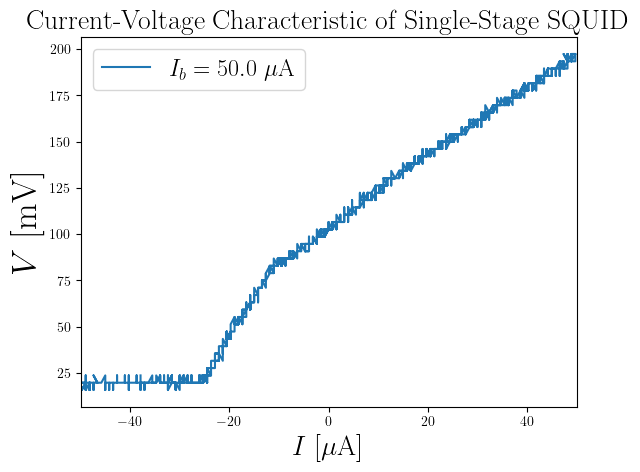

In [468]:
%matplotlib inline
# Convert values into floats
time1 = data.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
current = data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [mu A]
signal1 = data.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]


# plot signal
t_i = 17100
t_f = 19750
plt.plot(current[t_i:t_f]*100,signal1[t_i:t_f], label =r"$I_{b} = 50.0$ $\mu$A")
plt.title(r"Current-Voltage Characteristic of Single-Stage SQUID", fontsize =20)
plt.xlabel(r"$I$ [$\mu$A]", fontsize = 20)
plt.ylabel(r"$V$ [mV]", fontsize = 25)
plt.xlim(-50.0,50)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()

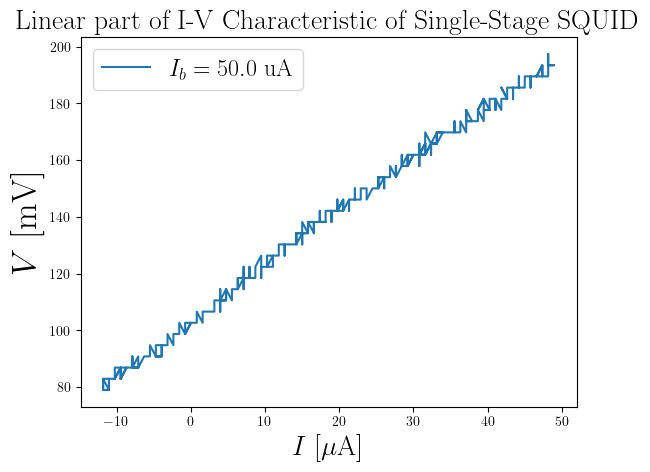

In [469]:
# plot signal
t_i = 17650
t_f = 18500
plt.plot(current[t_i:t_f]*100,signal1[t_i:t_f], label =r"$I_{b} = 50.0$ uA")
plt.title(r"Linear part of I-V Characteristic of Single-Stage SQUID", fontsize=20)
plt.xlabel(r"$I$ [$\mu$A]", fontsize = 20)
plt.ylabel(r"$V$ [mV]", fontsize = 25)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()

In [470]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost
current_fit = current[t_i:t_f]*100
signal_fit = signal1[t_i:t_f]
sigma = np.ones_like(current_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t0+t1*x

chi_2 = cost.LeastSquares(current_fit, signal_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=103, t1=1.9)
minuit.migrad()
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3729 (χ²/ndof = 4.4)       │              Nfcn = 53               │
│ EDM = 1.58e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │  103.61   │   0.05    │   -0.05    │    0.05    │         │         │       │
│ 1 │ t1   │  1.9006   │  0.0020   │  -0.0019   │   0.0019   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.05   │   0.05    │  -0.0019  │  0.0020   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────┐
│    │      t0      t1 │
├────┼─────────────────┤
│ t0 │ 0.00247  -70e-6 │
│ t1 │  -70e-6 3.8e-06 │
└────┴─────────────────┘

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\magnu\AppData\Local\Temp\ipykernel_95116\2843097255.py:9: SyntaxWarning: invalid escape sequence '\p'
  label='linear Fit: \n $t_0$ = {:.2f} $\pm$ 0.05 \n  $t_1$ = {:.3f} $\pm$ 0.002 '.format(t0_fit, t1_fit),


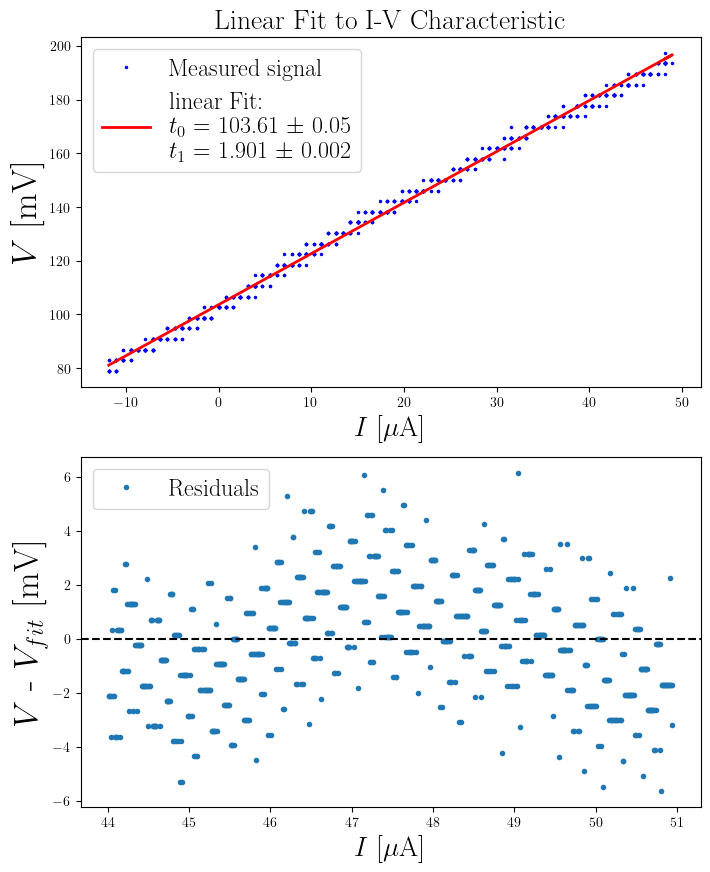

In [471]:
# Plot the data and the fitted model

t0_fit, t1_fit = minuit.values['t0'], minuit.values['t1']
fig, axs = plt.subplots(2, 1, figsize=(8,10))


axs[0].plot(current_fit, signal_fit,'b.', markersize=3, label = "Measured signal")
axs[0].plot(current_fit, linear(current_fit, t0_fit, t1_fit), '-', 
            label='linear Fit: \n $t_0$ = {:.2f} $\pm$ 0.05 \n  $t_1$ = {:.3f} $\pm$ 0.002 '.format(t0_fit, t1_fit), 
            linewidth=2, color = "red")
axs[0].set_title(r"Linear Fit to I-V Characteristic", fontsize=20)
axs[0].set_xlabel(r"$I$ [$\mu$A]", fontsize = 20)
axs[0].set_ylabel(r"$V$ [mV]", fontsize=25)
axs[0].legend(fontsize='xx-large', loc='best')
#axs[0].grid(True)


#plot residuals
residuals = signal_fit - linear(current_fit, t0_fit, t1_fit)
axs[1].plot(t_fit, residuals, 'o', label="Residuals", markersize=3)
axs[1].axhline(0, color='black', linestyle='--')
#axs[1].set_title("Residuals of the Linear Fit", fontsize=20)
axs[1].set_xlabel(r"$I$ [$\mu$A]", fontsize = 20)
axs[1].set_ylabel(r"$V$ - $V_{fit}$ [mV]", fontsize=25)
axs[1].legend(fontsize='xx-large', loc='best')
#axs[1].grid(True)


We find that the resistance of a normal conducting Josephson Junction is:
$$G_N = ( 1.910 \pm 0.002)\, \textrm{k}\Omega $$

#### TODO : 
find critical current. Hint: I think is where the normal conducting behaviour beginns, however, We would get a negative current. I noted that we should modify the scale of the current axis.

### 5.2.2 Flux Locked Loop

In the next part of the experiment, we measure the voltage-flux characteristics of the single stage SQUID remaning in the open loop set-up. In Fig. 2 we present the measured singal for $\Phi_B$ and $\Phi_x$ along with the parameters we use to take the measurement. Here, $I_B$ is selected to maximaze the voltage swing (in $\mu$V) and $V_{B}$ to center the signal $V_{out}$ around 0 V. 

Fig. 2: Signal measured for (left) $V-\Phi_x$ characteristic and (right) Measured $V-\Phi_B$ characteristic and their parameters.
<div style="display: flex; justify-content: space-between;">
  <img src=Measurements/5.2/V_PhiB_Max1.png"alt="V_PhiB_Max.png"  width="45%" />
  <img srcMeasurements/5.2/V_PhiX_max.pngngalt="V_PhiX_max.png" " width="45%" />
</div>


In [475]:
#create a dataframe of saves file using pandas
data_phi = pd.read_csv("Measurements/5.2/V_PhiB/V_PhiB_1.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

,Time,Channel A,Channel B
,(ms),(V),(mV)
0,"-100,00896454","-0,17375120","63,17667000"
1,"-100,00080454","-0,17375120","59,22428000"
2,"-99,99264454","-0,17375120","55,27190000"
3,"-99,98448454","-0,17375120","59,22428000"
4,"-99,97632454","-0,17375120","55,27190000"


In [476]:
data_phix = pd.read_csv("Measurements/5.2/V_PhiX_1/V_PhiX_1.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

,Time,Channel A,Channel B
,(ms),(V),(mV)
0,"-100,00896454","-0,17375120","63,17667000"
1,"-100,00080454","-0,17375120","59,22428000"
2,"-99,99264454","-0,17375120","55,27190000"
3,"-99,98448454","-0,17375120","59,22428000"
4,"-99,97632454","-0,17375120","55,27190000"


In [477]:
#calculate flux
def I_S(x, Ic, phi_1):
    return 

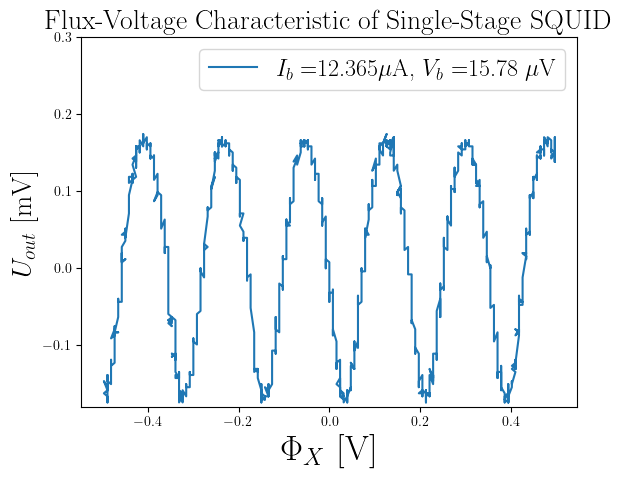

In [555]:
#Convert values into floats
time_X = data_phix.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
flux_X= data_phix.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
signal_X = data_phix.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]
signal_X = signal_X/100 #V
# plot signal

t_i = 8230
t_f = 9635
#plt.plot(time_X[t_i:t_f],flux_X[t_i:t_f], label =r"$I_{b} = 50.0$ $\mu$A")
plt.plot(flux_X[t_i:t_f],signal_X[t_i:t_f], label =r"$I_{b} = $12.365$\mu$A, $V_b$ =15.78 $\mu$V")
plt.title(r"Flux-Voltage Characteristic of Single-Stage SQUID", fontsize=20)
plt.ylabel(r"$U_{out}$ [mV]", fontsize = 20)
plt.xlabel(r"$\Phi_X$ [V]", fontsize = 25)
plt.ylim(-0.18,0.30)
plt.legend( fontsize='xx-large', loc = 'best')

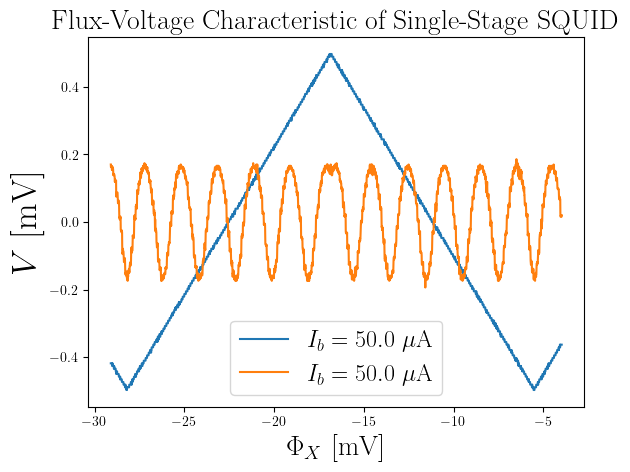

In [557]:
t_i = 8126
t_f = 11205
plt.plot(time_X[t_i:t_f],flux_X[t_i:t_f], label =r"$I_{b} = 50.0$ $\mu$A")
plt.plot(time_X[t_i:t_f],signal_X[t_i:t_f], label =r"$I_{b} = 50.0$ $\mu$A")
plt.title(r"Flux-Voltage Characteristic of Single-Stage SQUID", fontsize =20)
plt.xlabel(r"$\Phi_X$ [mV]", fontsize = 20)
plt.ylabel(r"$V$ [mV]", fontsize = 25)
plt.legend( fontsize='xx-large', loc = 'best')

In [480]:
time_B = data_phi.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
flux_B= data_phi.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
signal_B = data_phi.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]